In [38]:
import pandas as pd
import numpy as np
from textblob import TextBlob as tb
from string import punctuation
from nltk.corpus import wordnet as wn
import operator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins

In [70]:
# Data cleaning

resume = pd.read_csv('resume_dataset.csv')
print(resume['Category'].isnull())
print(resume['Resume'].isnull())
resume['Resume'] = resume['Resume'].str.replace('[^\w\s\n#@/:%.,_-]', '')
resume['Resume'] = resume['Resume'].str.replace('[â\*]', '')
resume['Resume'] = resume['Resume'].str.replace('[ª]', '')
# print(resume.head())

0      False
1      False
2      False
3      False
4      False
       ...  
164    False
165    False
166    False
167    False
168    False
Name: Category, Length: 169, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
164    False
165    False
166    False
167    False
168    False
Name: Resume, Length: 169, dtype: bool


In [71]:
#filter by category = Data Science
df = resume[resume['Category'] == 'Data Science']
df['Resume']

0    Skills  Programming Languages: Python pandas, ...
1    Education Details \r\nMay 2013 to May 2017 B.E...
2    Areas of Interest Deep Learning, Control Syste...
3    Skills  R  Python  SAP HANA  Tableau  SAP HANA...
4    Education Details \r\n MCA   YMCAUST,  Faridab...
5    SKILLS C Basics, IOT, Python, MATLAB, Data Sci...
6    Skills  Python  Tableau  Data Visualization  R...
7    Education Details \r\n B.Tech   Rayat and Bahr...
8    Personal Skills  Ability to quickly grasp tech...
9    Expertise  Data and Quantitative Analysis  Dec...
Name: Resume, dtype: object

In [94]:
# get the commonly used word in ntlk and create a list of unwanted words
UW=set(stopwords.words('english'))
UWs=['Experience','months','company','year','exprience','24','details','year','january','pvt','ltd']
#create list to store words
ngram_2=[]
#for every description in resume
for i in df['Resume']:
    #set a = spread all words in that review into 2 words by using ngram
    a= tb(i).ngrams(n=2)
    #for number between 0 to lenth of a
    for j in range(0,len(a)):
        #lower case the 1st word
        word=a[j][0].lower()
        #lower case the 2nd word
        word1=a[j][1].lower()
        #if the word not in commonly used word in ntlk and not in the list we created earlier
        if word not in UW and word1 not in UW and word not in UWs and word1 not in UWs:
            #lemmatize the words and append to the list 
            b=a[j].lemmatize()
            ngram_2.append(b)

In [95]:
ngram_2

[WordList(['Skills', 'Programming']),
 WordList(['Programming', 'Languages']),
 WordList(['Languages', 'Python']),
 WordList(['Python', 'panda']),
 WordList(['panda', 'numpy']),
 WordList(['numpy', 'scipy']),
 WordList(['scipy', 'scikit-learn']),
 WordList(['scikit-learn', 'matplotlib']),
 WordList(['matplotlib', 'Sql']),
 WordList(['Sql', 'Java']),
 WordList(['Java', 'JavaScript/JQuery']),
 WordList(['JavaScript/JQuery', 'Machine']),
 WordList(['Machine', 'learning']),
 WordList(['learning', 'Regression']),
 WordList(['Regression', 'SVM']),
 WordList(['SVM', 'NaÃve']),
 WordList(['NaÃve', 'Bayes']),
 WordList(['Bayes', 'KNN']),
 WordList(['KNN', 'Random']),
 WordList(['Random', 'Forest']),
 WordList(['Forest', 'Decision']),
 WordList(['Decision', 'Trees']),
 WordList(['Trees', 'Boosting']),
 WordList(['Boosting', 'technique']),
 WordList(['technique', 'Cluster']),
 WordList(['Cluster', 'Analysis']),
 WordList(['Analysis', 'Word']),
 WordList(['Word', 'Embedding']),
 WordList(['Embeddi

In [96]:
#create list
wordlist = []
#for every value in test1
for i in ngram_2:
    #combine 2 words tgt
    wordlist.append(i[0]+ " "+i[1])

#another list
wordlist1=[]
#for number between 0 to length of wordlist
for i in range(0,len(wordlist)):
    #lower case
    a=wordlist[i].lower()
    #append to list
    wordlist1.append(a)

#create a dict
word_dict = {}
#for every value in wordlist1 
for i in wordlist1:
    #if it is in the dict alr
    if i in word_dict:
        #the count +1
        word_dict[i] +=1
    # if not
    else:
        #insert the word and let count =1
        word_dict[i] =1

#sort them in decscending order 
skilllist = sorted(word_dict.items(),key=operator.itemgetter(1), reverse = True)
#take the 1st 50 only
skilllist1=skilllist[:50]
skilllist1

[('machine learning', 36),
 ('data science', 27),
 ('deep learning', 12),
 ('sap hana', 9),
 ('technical environment', 9),
 ('key responsibilities', 7),
 ('learning deep', 7),
 ('sentiment analysis', 6),
 ('aegis school', 6),
 ('topic modelling', 5),
 ('neural network', 5),
 ('learning data', 5),
 ('language processing', 4),
 ('tools technologies', 4),
 ('data modelling', 4),
 ('project involved', 4),
 ('cross industry', 4),
 ('service area', 4),
 ('project name', 4),
 ('data model', 4),
 ('developed various', 4),
 ('decision tree', 4),
 ('sql server', 4),
 ('data visualization', 4),
 ('neural intelligence', 4),
 ('intelligence platform', 4),
 ('deep machine', 4),
 ('user query', 4),
 ('tensor flow', 4),
 ('madhya pradesh', 4),
 ('skills programming', 3),
 ('technologies python', 3),
 ('time series', 3),
 ('chat bot', 3),
 ('unstructured data', 3),
 ('data source', 3),
 ('elastic search', 3),
 ('python software', 3),
 ('data analysis', 3),
 ('hana tableau', 3),
 ('advance analytics', 3

In [109]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE
%matplotlib inline

In [110]:
# get unique words and sentence count
def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences=sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1 
    word_count = len(vocab.keys())
    return sent_count,word_count

In [137]:
resume = resume[resume['Resume'].notna()]
sent_count,word_count= get_sentence_word_count(resume['Resume'].tolist())
print("Number of sentences in Resume column: "+ str(sent_count))
print("Number of unique words in Resume column: "+str(word_count))
data_categories  = resume.groupby(resume['Category'])
i = 1
print('=========== Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

Number of sentences in Resume column: 169
Number of unique words in Resume column: 2716
=========== Categories =======================
Cat:1 Advocate : 10
Cat:2 Arts : 6
Cat:3 Automation Testing : 7
Cat:4 Blockchain : 5
Cat:5 Business Analyst : 6
Cat:6 Civil Engineer : 6
Cat:7 Data Science : 10
Cat:8 Database : 11
Cat:9 DevOps Engineer : 7
Cat:10 DotNet Developer : 7
Cat:11 ETL Developer : 5
Cat:12 Electrical Engineering : 5
Cat:13 HR : 11
Cat:14 Hadoop : 7
Cat:15 Health and fitness : 6
Cat:16 Java Developer : 14
Cat:17 Mechanical Engineer : 5
Cat:18 Network Security Engineer : 5
Cat:19 Operations Manager : 4
Cat:20 PMO : 3
Cat:21 Python Developer : 6
Cat:22 SAP Developer : 6
Cat:23 Sales : 5
Cat:24 Testing : 7
Cat:25 Web Designing : 5


In [143]:
print('============ Categories Resume example======================')
i=1
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    dataList = dataCategory['Resume'].tolist()
    print('====================================================')
    print('Sample Resume:'+str(dataList[1]))
    print('====================================================')
    i = i+1

print('============ Categories Resume example======================')

============ Categories Resume example======================
Cat:1 Advocate : 10
Sample Resume:education detail bcom llb university of clacutta university of burdwanadvocateskill detail taxation matter income tax gst p tax account exprience le than year month filing of income tax return gst return etd air and more exprience le than year monthscompany detail company own practice description education detail bcom llb university of clacutta university of burdwanadvocateskill detail taxation matter income tax gst p tax account exprience le than year month filing of income tax return gst return etd air and more exprience le than year monthscompany detail company own practice description
Cat:2 Arts : 6
Sample Resume:operating system window xp vista education detail january mfa painting nagpur maharashtra nagpur university january bfa to improve my knowledge and experience in this field
Cat:3 Automation Testing : 7
Sample Resume:social skill ability to establish trust and work with a team com

In [113]:
# text cleanning function

def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))       
    return ' '.join(wordlist)

In [147]:
data = resume[['Category', 'Resume']]
data.shape

(169, 2)

In [149]:
print('Sample Resume 1:'+data.iloc[1]['Resume']+'\n')
print('Sample Resume 2:'+data.iloc[25]['Resume']+'\n')
print('Sample Resume 3:'+data.iloc[100]['Resume'])

Sample Resume 1:education detail may to may be uitrgpvdata scientistdata scientist matelabsskill detail python exprience le than year month statsmodels exprience month aws exprience le than year month machine learning exprience le than year month sklearn exprience le than year month scipy exprience le than year month kera exprience le than year monthscompany detail company matelabs description ml platform for business professional dummy and enthusiast githubcomrathorology implemented a state of the art research paper on outlier detection for mixed attribute

Sample Resume 2:skill know english a native speaker ielts overall listening reading writing and speaking hindi with bilingual proficiency and punjabi a native speaker negotiates settlement of civil dispute

Sample Resume 3:education detail july to may be electrical and electronics engineering bhopal madhya pradesh rgpv july to may diploma in electrical electrical engineering bhopal madhya pradesh rgpv university bhopal matric ghs b

In [150]:
resume['Resume'] = resume['Resume'].apply(lemmatize_text)
resume['Resume'] = resume['Resume'].apply(clean_text)

In [151]:
print('Sample Resume 1:'+data.iloc[1]['Resume']+'\n')
print('Sample Resume 2:'+data.iloc[25]['Resume']+'\n')
print('Sample Resume 3:'+data.iloc[100]['Resume'])

Sample Resume 1:education detail may to may be uitrgpvdata scientistdata scientist matelabsskill detail python exprience le than year month statsmodels exprience month aws exprience le than year month machine learning exprience le than year month sklearn exprience le than year month scipy exprience le than year month kera exprience le than year monthscompany detail company matelabs description ml platform for business professional dummy and enthusiast githubcomrathorology implemented a state of the art research paper on outlier detection for mixed attribute

Sample Resume 2:skill know english a native speaker ielts overall listening reading writing and speaking hindi with bilingual proficiency and punjabi a native speaker negotiates settlement of civil dispute

Sample Resume 3:education detail july to may be electrical and electronics engineering bhopal madhya pradesh rgpv july to may diploma in electrical electrical engineering bhopal madhya pradesh rgpv university bhopal matric ghs b

In [152]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['Resume'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)

['abap', 'ability', 'ability work', 'academy', 'accenture', 'access', 'account', 'accounting', 'achievement', 'acquired', 'activity', 'admin', 'administration', 'administrator', 'advance', 'advisor', 'agile', 'agreement', 'ajax', 'ajax exprience', 'american', 'amravati', 'amravati maharashtra', 'analysis', 'analyst', 'analytics', 'analyzing', 'android', 'angular', 'apache', 'apache tomcat', 'api', 'application', 'application environment', 'april', 'architect', 'area', 'area expertise', 'art', 'art craft', 'asa', 'aspnet', 'aspnet mvc', 'att', 'attendance', 'attendance application', 'attitude', 'audit', 'august', 'autocad', 'automation', 'automation testing', 'available', 'award', 'aws', 'ax', 'azure', 'ba', 'bachelor', 'bachelor engineering', 'bachelor engineering information', 'bachelor law', 'backup', 'bank', 'bank chinchwad', 'bank chinchwad pune', 'banking', 'based', 'basic', 'basis', 'bca', 'bcom', 'beginner', 'bengaluru', 'bengaluru karnataka', 'best', 'bharat', 'bhopal', 'bi', '

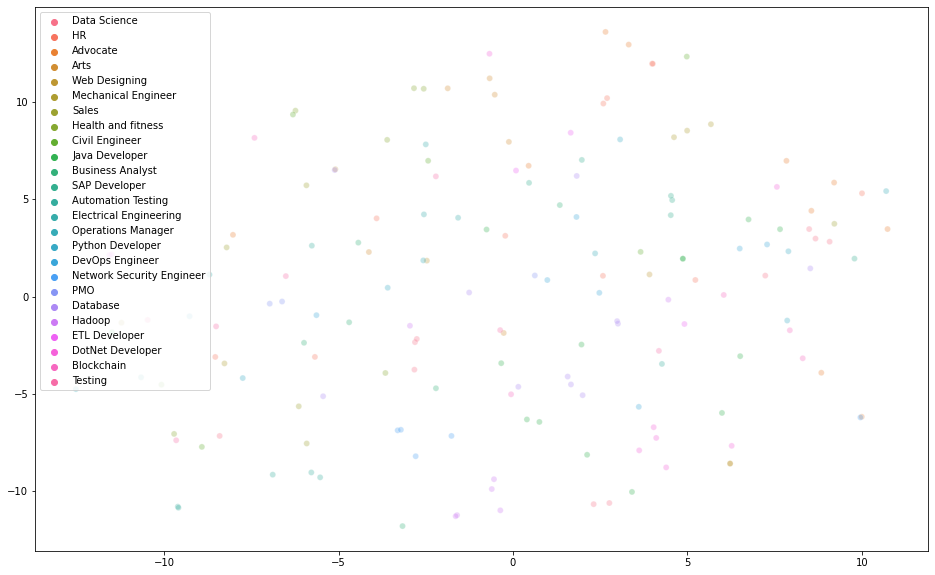

In [166]:
import gc
gc.collect()
tfIdfMatrix = tfIdfMat.todense()
labels = data['Category'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(16,10))
palette = sns.hls_palette(21, l=.6, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    legend="full",
    alpha=0.3
)
plt.show()

In [175]:

gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['Category'].tolist()
category_list = data.Category.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, test_size=0.2,random_state=1)

In [176]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(135, 134)
Test_Set_Size:(34, 134)


In [177]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

In [178]:
labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels)

C:\Users\LJiaGeng\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


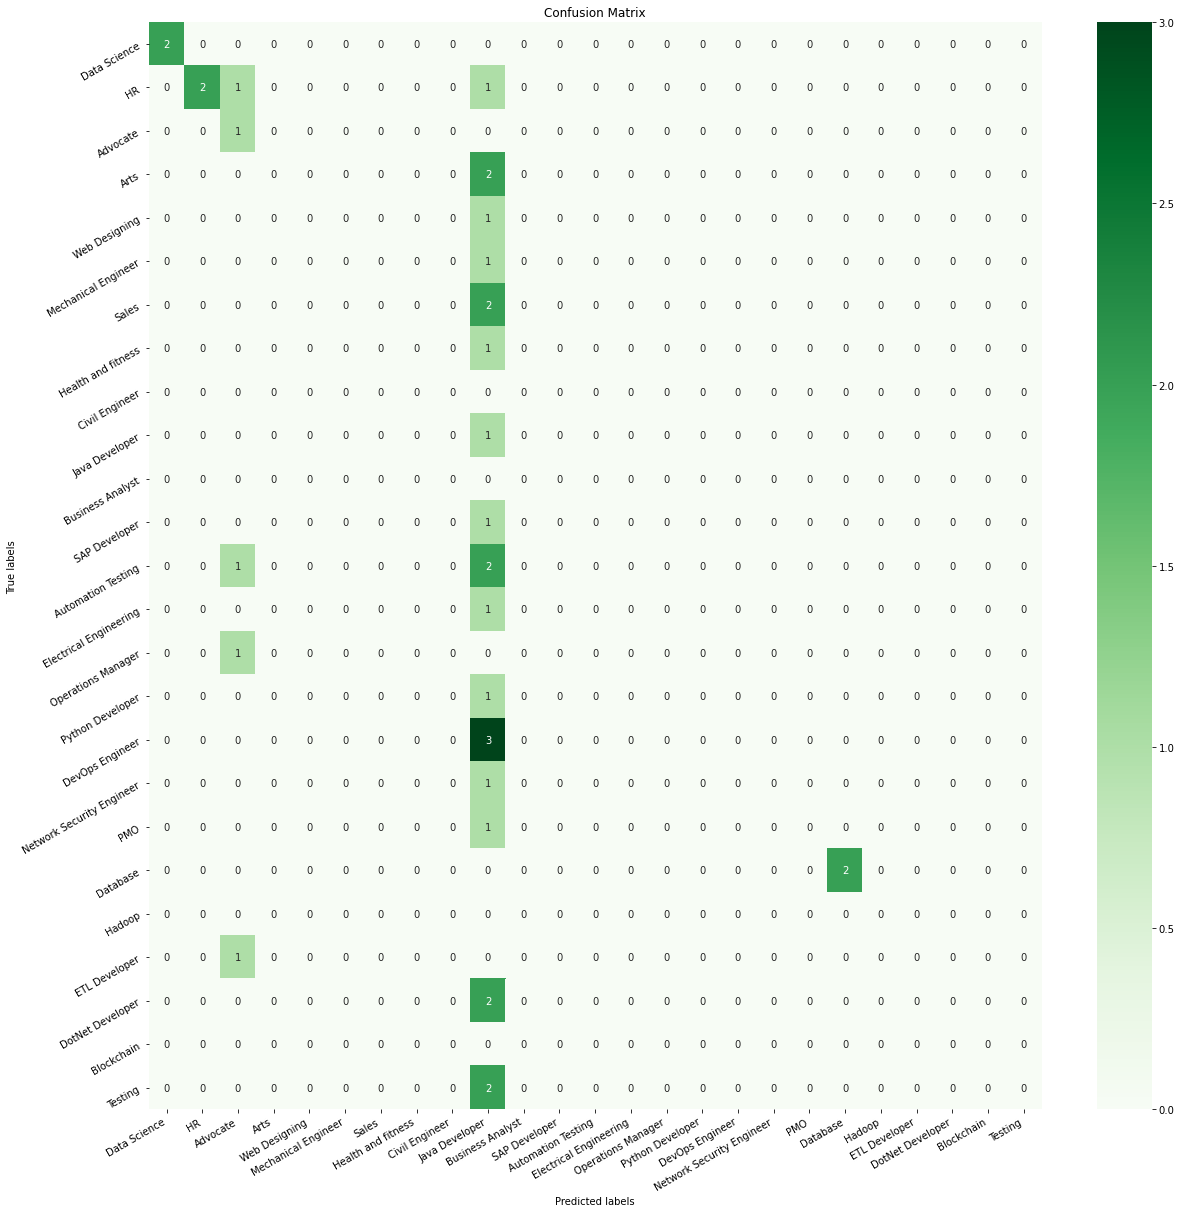

In [179]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()


In [180]:
print(classification_report(y_test,y_test_pred,labels=category_list))

                           precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         2
                       HR       1.00      0.50      0.67         4
                 Advocate       0.20      1.00      0.33         1
                     Arts       0.00      0.00      0.00         2
            Web Designing       0.00      0.00      0.00         1
      Mechanical Engineer       0.00      0.00      0.00         1
                    Sales       0.00      0.00      0.00         2
       Health and fitness       0.00      0.00      0.00         1
           Civil Engineer       0.00      0.00      0.00         0
           Java Developer       0.04      1.00      0.08         1
         Business Analyst       0.00      0.00      0.00         0
            SAP Developer       0.00      0.00      0.00         1
       Automation Testing       0.00      0.00      0.00         3
   Electrical Engineering       0.00      0.00      0.00     

C:\Users\LJiaGeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LJiaGeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
